<a href="https://colab.research.google.com/github/MinhTho-162/Handwrite_Digit_Reconization/blob/main/Handwrite_Digit_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install package

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pillow
!pip install tk

## MNIST dataset

MNIST là bộ dữ liệu phổ biến cho ML/DL. Có 60.000  ảnh training chữ viết tay từ 0 đến 9 và  10.000 ảnh để test trong dataset MNIST. Ảnh chữ viết tay được hiển thị dưới dạng ma trân 28x28 trong đó mỗi ô chứa giá trị pixel theo thang đo xám.

Xây dựng mô hình **Convolutional neuron network** (CNN hay ConvNet) bằng cách sử dụng Tensorflow là một thuật toán ML có thể lấy một hình ảnh đầu vào, gán tầm quan trọng (trọng số và thành kiến ​​có thể học được) cho các khía cạnh / đối tượng khác nhau trong hình ảnh và có thể phân biệt cái này với cái khác.

## Import libraries and dataset

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from tensorflow import keras
import tensorflow as tf
import datetime

import numpy as np
import pandas as pd


## Load datasetdataset

In [ ]:
#  to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

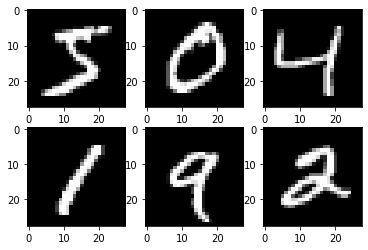

In [ ]:
#plot first  six sample of MNIST training datataset as gray scale image
import matplotlib.pyplot  as plt
for i in range(6):
  plt.subplot(int('23' + str(i+1)))
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

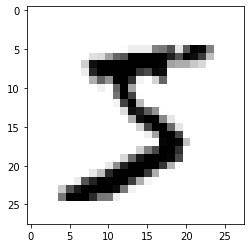

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

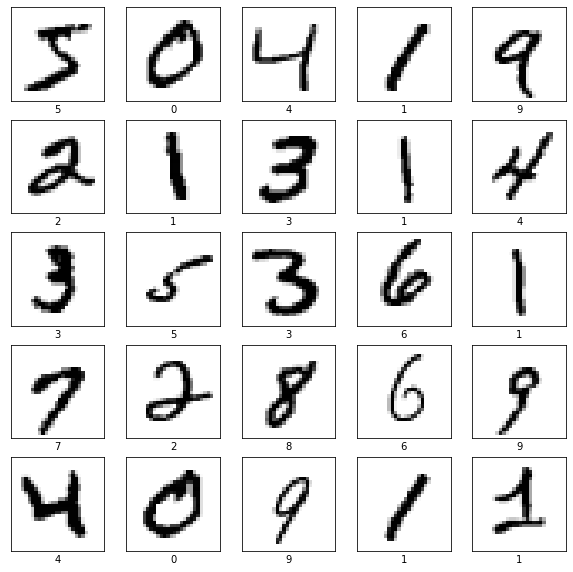

In [ ]:
import math
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Data Processing

In [ ]:
## reshape data and Normalize data

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# conversion of class vectors to matrices of  binary class 
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


## Create the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In [ ]:
# build CNN model and compile 
def create_model():
  num_classes = 10
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
  return model

  
#build model
model = create_model()

In [ ]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2359552   
                                                      

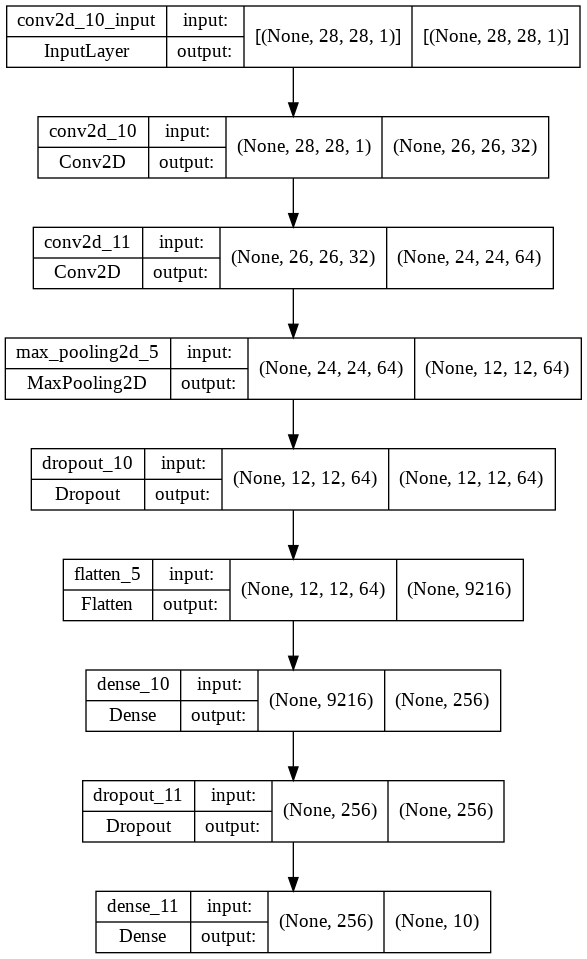

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Train the model

In [ ]:
batch_size = 200
num_classes = 10
epochs = 10 
history = model.fit(x_train, y_train, validation_split=0.1, epochs = epochs, batch_size = batch_size, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 174s 644ms/step - loss: 0.2359 - accuracy: 0.9266 - val_loss: 0.0555 - val_accuracy: 0.9848
Epoch 2/10
270/270 [==============================] - 134s 495ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0418 - val_accuracy: 0.9892
Epoch 3/10
270/270 [==============================] - 132s 489ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0403 - val_accuracy: 0.9905
Epoch 4/10
270/270 [==============================] - 132s 488ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 5/10
270/270 [==============================] - 132s 488ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0315 - val_accuracy: 0.9927
Epoch 6/10
270/270 [==============================] - 132s 487ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0351 - val_accuracy: 0.9923
Epoch 7/10
270/270 [==============================] - 132s 487ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0329 -

Text(0.5, 0, 'epoch')

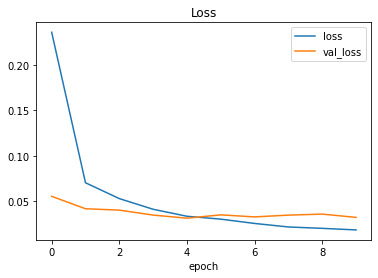

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

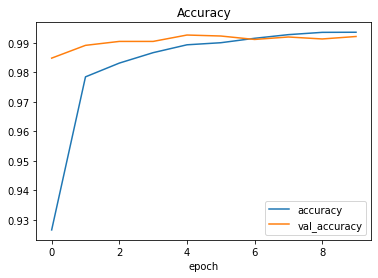

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

## Evaluate the model


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.026597803458571434
Test accuracy: 0.9919999837875366


### Training set accuracy

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.007837450131773949
Training accuracy:  0.997783362865448


### Test set accuracy


In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.026597803458571434
Validation accuracy:  0.9919999837875366


## Save model

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

### Use the model

In [ ]:
predictions_one_hot = loaded_model.predict([x_test])

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print(predictions[0])

7


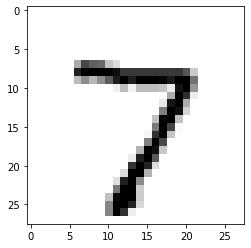

In [ ]:
plt.imshow(x_test[0].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

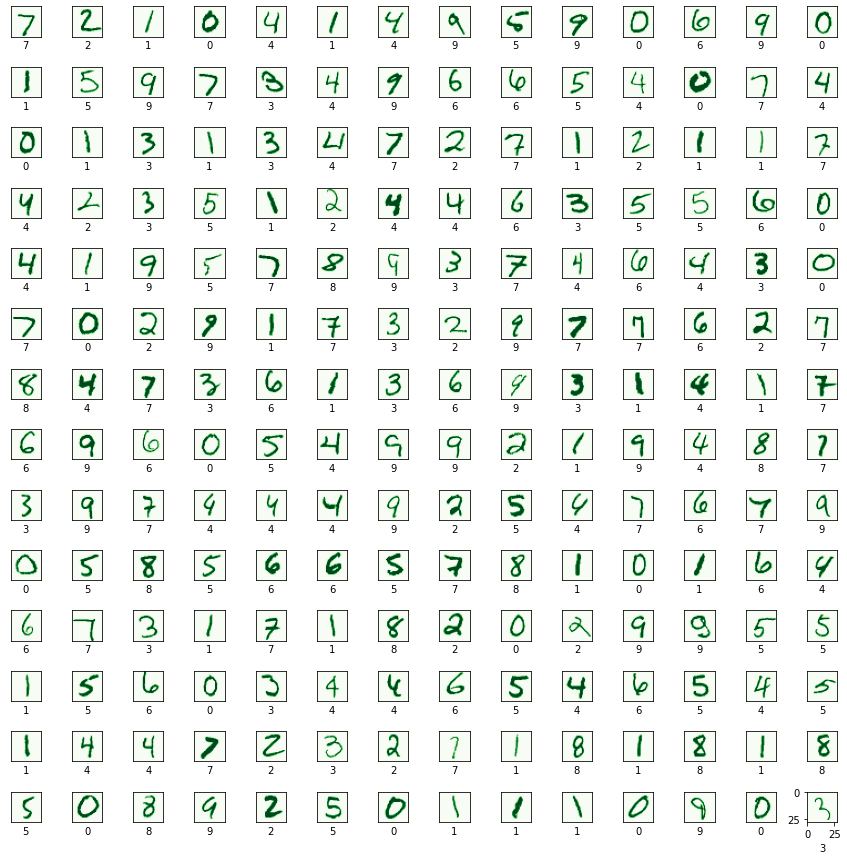

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

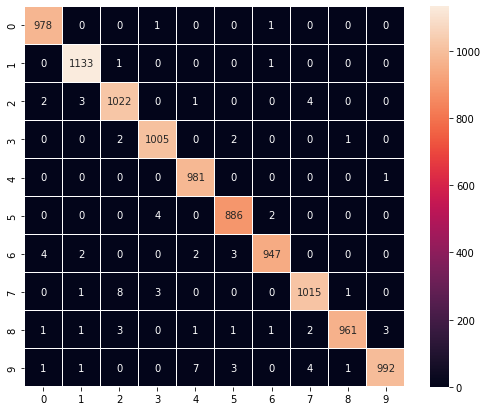

In [ ]:
import seaborn as sn

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()